# 5. Sampling & Sampling Distributions

## 1. Population vs Sample
- **Population**: The entire set of individuals, items, or data points of interest.
- **Sample**: A subset of the population used for analysis.
- Sampling is done when studying the entire population is impractical.

---

## 2. Sampling Techniques

### (a) Simple Random Sampling
Every member of the population has an equal chance of being selected.
- Example: Randomly selecting 50 students out of 1000.

### (b) Stratified Sampling
Population is divided into groups (strata) based on certain characteristics, and samples are taken from each stratum.
- Example: Sampling students proportionally from each grade.

### (c) Cluster Sampling
Population is divided into clusters, and entire clusters are randomly selected.
- Example: Randomly selecting 5 classrooms and surveying all students in them.

---

## 3. Central Limit Theorem (CLT)
The CLT states that if you take sufficiently large random samples ($n > 30$) from any population with mean $\mu$ and variance $\sigma^2$, then the sampling distribution of the sample mean $\bar{X}$ is approximately normal:

$$ \bar{X} \sim N \left( \mu, \frac{\sigma^2}{n} \right) $$

---

## 4. Standard Error (SE)
The standard error measures the variability of the sample statistic (e.g., sample mean) from the population parameter.

- Formula for the standard error of the mean:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

where:
- $\sigma$ = population standard deviation
- $n$ = sample size

If population standard deviation is unknown, we use sample standard deviation $s$:

$$ SE = \frac{s}{\sqrt{n}} $$

---

✅ **Why it matters:**
- **CLT** ensures we can use normal distribution for inference, even if population distribution is not normal.
- **SE** tells us how reliable our sample mean is as an estimate of the population mean.
- **Bigger sample size**
𝑛
n → distribution of sample means closer to normal.

- **Standard deviation of sample mean** = Standard Error:


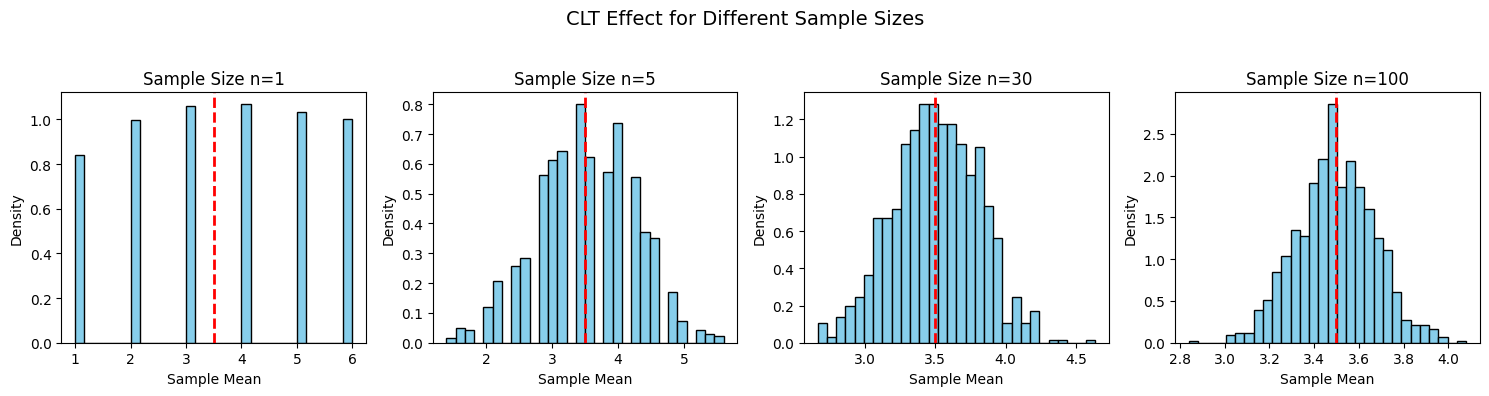

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles


def simulate_clt(sample_size,num_samples=1000):
    population=[1,2,3,4,5,6]
    sample_means=[]

    for _ in range(num_samples):
        sample=np.random.choice(population,size=sample_size,replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

sample_sizes=[1,5,30,100]

plt.figure(figsize=(15,4))
for i,n in enumerate(sample_sizes,1):
    means=simulate_clt(n)
    plt.subplot(1,4,i)
    plt.hist(means,bins=30,density=True,color='skyblue',edgecolor='black')
    plt.axvline(x=np.mean([1,2,3,4,5,6]),color='red',linestyle='dashed',linewidth=2)
    plt.title(f"Sample Size n={n}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")

plt.suptitle("CLT Effect for Different Sample Sizes", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


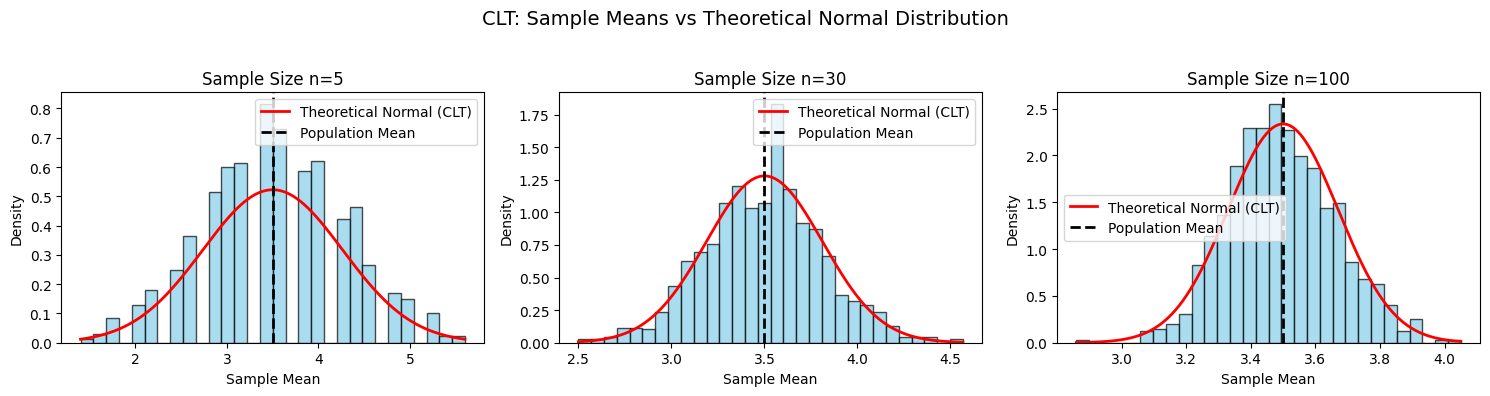

In [15]:
from scipy.stats import norm

# Function to simulate CLT with overlay of theoretical normal distribution
def simulate_and_plot(sample_size, num_samples=1000):
    population = [1, 2, 3, 4, 5, 6]
    mu = np.mean(population)
    sigma = np.std(population, ddof=0)

    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))

    # Plot histogram
    plt.hist(sample_means, bins=30, density=True, color="skyblue", edgecolor="black", alpha=0.7)

    # Theoretical normal distribution (CLT prediction)
    x = np.linspace(min(sample_means), max(sample_means), 1000)
    pdf = norm.pdf(x, loc=mu, scale=sigma/np.sqrt(sample_size))
    plt.plot(x, pdf, 'r-', lw=2, label="Theoretical Normal (CLT)")

    plt.axvline(mu, color="black", linestyle="dashed", linewidth=2, label="Population Mean")
    plt.title(f"Sample Size n={sample_size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()

sample_sizes = [5, 30, 100]
plt.figure(figsize=(15, 4))

for i, n in enumerate(sample_sizes, 1):
    plt.subplot(1, 3, i)
    simulate_and_plot(n)

plt.suptitle("CLT: Sample means vs Theoretical normal distribution", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
